In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from sklearn.datasets import fetch_openml


This imports the `fetch_openml` function from scikit-learn's `datasets` module.  
- `fetch_openml` is used to fetch datasets hosted on [OpenML](https://www.openml.org/), an online platform for sharing datasets.


Importing the Boston House Price Dataset from OpenML.

In [ ]:
boston=fetch_openml(name="boston",version=1,as_frame=True)

This downloads the Boston Housing dataset from OpenML.

name="boston": Specifies the dataset to fetch.

version=1: Specifies version 1 of the dataset.

as_frame=True: Ensures the data is returned as a pandas DataFrame instead of a NumPy array, making it easier to work with in a tabular format.

The result (boston) is a Bunch object, which is like a dictionary with attributes.



In [ ]:
print(boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [ ]:
#pandas data frame
house_price_dataframe= pd.DataFrame(boston.data, columns=boston.feature_names)

Creates a new DataFrame (`house_price_dataset`) from the feature data in the Boston dataset.
- `boston.data`: The actual feature values (e.g., crime rate, number of rooms, etc.).
- `boston.feature_names`: The names of those features, used as column headers.


In [ ]:
house_price_dataframe.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [ ]:
house_price_dataframe.shape

(506, 14)

In [ ]:
# add the target (price) column to the dataframe
house_price_dataframe['price']=boston.target

In normal house_price_dataset dataframe we do not have target column because we have imported only data array not target array(boston.data) so we add it now as price.

In [ ]:
house_price_dataframe.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [ ]:
house_price_dataframe['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [ ]:
house_price_dataframe.shape

(506, 14)

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [ ]:
#statistical measures of the dataset
house_price_dataframe.describe()

CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT       price  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116    2.164946   91.294864    7.141062    9.197104  
min      1.129600  187.000000   12.600000    0.320000    1.730000    5.000000  
25%      2.100175  279.000000   17.400000  375.377500    6.950000   17.025000  
50%      3.207450  330.000000   19.050000  391.440000   11.360000   21.200000  
75%      5.188425  666.000000   20.200000  396.225000   16.955000   25.000000  
max     12.126500  711.000000   22.000000  396.900000   37.970000   50.000000

Understanding the correlation between various features in the dataset.

1.Positive correlation

2.Negative correlation

In [ ]:
correlation=house_price_dataframe.corr()   #house_price_dataset.corr() computes the correlation matrix of the dataset.

<Axes: >

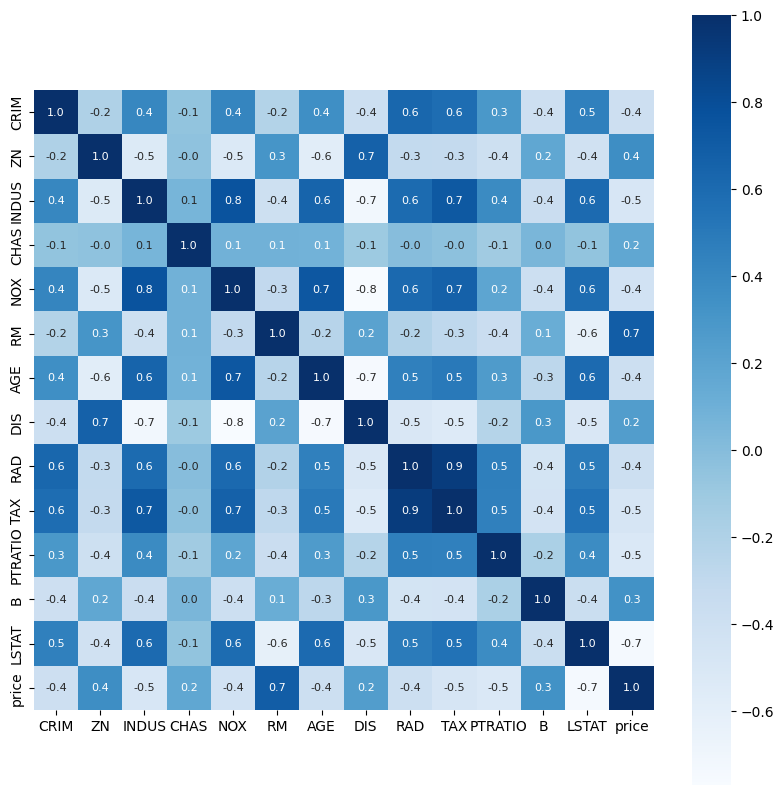

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))  #Creates a new figure for the plot with a size of 10x10 inches.
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

correlation: the data you want to visualize (your computed correlation matrix).

cbar=True: shows a color bar on the side that represents the scale of correlation values.

square=True: forces each cell in the heatmap to be a square shape (for a neat grid).

fmt='.1f': formats the correlation numbers inside the heatmap with 1 decimal place.

annot=True: writes the correlation values inside each square.

annot_kws={'size':8}: sets the font size of the annotations (numbers) to 8.

cmap='Blues': uses a blue color palette, where darker blue usually indicates a higher correlation.

Splitting the data and target

In [ ]:
x=house_price_dataframe.drop(['price'],axis=1)
y=house_price_dataframe['price']

In [ ]:
print(x)
print(y)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Splitting the data into training data and test data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

**XGBoost Regressor**

🔷 What is XGBoost?
XGBoost (Extreme Gradient Boosting) is a very powerful and efficient machine learning algorithm based on Gradient Boosting.

It works by:

Building decision trees one after another (sequentially).

Each new tree tries to correct the errors of the previous ones.

Final prediction is made by combining the outputs of all the trees (like a team effort).

🔷 What is XGBRegressor?
XGBRegressor is a regression model from the XGBoost library. It is used when your target variable is continuous (like house prices, temperatures, sales, etc.).

✅ Use XGBRegressor when:

You’re solving a regression problem (predicting continuous values).

Your data has:

Complex relationships between features

Missing values

Need for high performance (speed + accuracy)

You're facing non-linear data where simple models like Linear Regression fail.

You want a model that can handle feature importance and robustness.



In [ ]:
#loading the model
model=XGBRegressor(enable_categorical=True)

We use enable_categorial=True beacuse XGBoost expects only:

int, float, bool

OR category (only if enable_categorical=True) and in our dataset CHAS and RAD are stored as category.

In [ ]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction=model.predict(x_train)

In [ ]:
print(training_data_prediction)

[23.12537   20.993305  20.101828  34.698845  13.90048   13.498627
 21.999454  15.204494  10.898279  22.683517  13.804576   5.5999727
 29.800287  49.997086  34.899097  20.602865  23.385353  19.18291
 32.698814  19.600945  26.994783   8.395777  46.001015  21.715147
 27.077194  19.379717  19.300058  24.795628  22.610891  31.724024
 18.511816   8.700756  17.401417  23.702253  13.299225  10.512143
 12.678252  24.998468  19.690723  14.897103  24.204836  25.00939
 14.899758  16.997213  15.595185  12.692106  24.50731   15.006159
 50.001972  17.517784  21.202095  31.99562   15.607423  22.901945
 19.320164  18.720781  23.302368  37.205223  30.100294  33.103645
 21.010303  49.99931   13.399545   5.0076556 16.498867   8.398998
 28.66987   19.494442  20.597595  45.400585  39.803585  33.40453
 19.807894  33.4003    25.29777   49.998013  12.523513  17.439049
 18.603155  22.59679   50.004223  23.796879  23.307257  23.081825
 41.711502  16.112608  31.59987   36.09465    7.0044384 20.387278
 20.00197   

📘 1. R-squared Error (R² Score)
🔍 What It Is:
R-squared is a statistical measure that explains how well your regression model predicts the actual values. It tells you the percentage of variation in the output (dependent variable) that is explained by the input (independent variables) used in your model.

🧠 Intuition:
Think of R² as an indicator of how good your model is:

R² = 1 → Perfect prediction (model explains all the variation).
R² = 0 → The model is no better than predicting the average value.
R² < 0 → The model is worse than predicting the average.
📏 How It Works:
It compares your model’s errors to a simple model that just predicts the mean of the actual data. If your model performs better than that, R² will be > 0.

🔢 Example:
If R² = 0.85, it means 85% of the variation in the data is explained by your model, and 15% is unexplained (random error or missing variables).

📘 2. Mean Absolute Error (MAE)
🔍 What It Is:
MAE is the average of the absolute differences between the actual values and the predicted values. It gives a clear idea of how far off your predictions are, on average.

🧠 Intuition:
If the MAE is 5, it means your predictions are off by 5 units (on average), regardless of direction (above or below).

📏 How It Works:
Take the difference between actual and predicted values.
Convert those differences to absolute values (ignore minus signs).
Take the average of all those absolute errors.
✔️ Why It’s Useful:
It’s easy to interpret.
It gives a real-world scale of the error.
It’s not sensitive to outliers (unlike squared errors).
🆚 Summary Table
Metric	Tells You...	Range	Ideal Value
R² Score	% of variation explained by the model	(-∞, 1]	Closer to 1
MAE	Average size of prediction errors	[0, ∞)	Closer to 0


In [ ]:
# R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)

#Mean absolute error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

print("R squared error:",score_1)
print("Mean absolute error:",score_2)

R squared error: 0.9999985261877631
Mean absolute error: 0.007722842103183917


Visualizing the actual prices and predicted prices

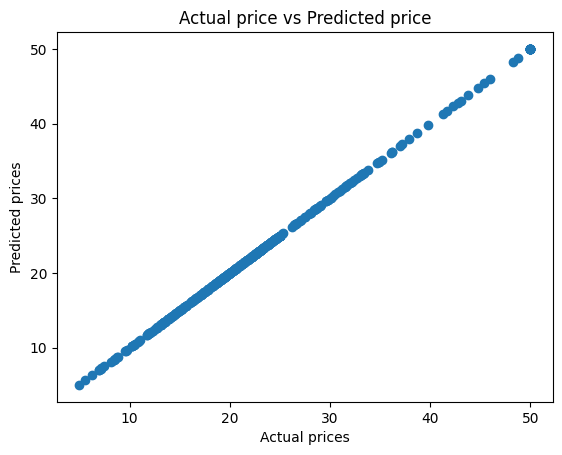

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price vs Predicted price")
plt.show()

**Prediction on test data**

In [ ]:
# accuracy for prediction on test data
test_data_prediction=model.predict(x_test)

In [ ]:
# R squared error
score_1=metrics.r2_score(y_test,test_data_prediction)

#Mean absolute error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)

print("R squared error:",score_1)
print("Mean absolute error:",score_2)

R squared error: 0.9110784518505095
Mean absolute error: 2.075374621970981


Building a predictive sysytem.

In [ ]:
input_data=(0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98)
# change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance not for all the values
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)


[25.061417]
